In [98]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [139]:
train = pd.read_csv('train.csv', infer_datetime_format=True,
                  parse_dates=[2])

C:\Users\henri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\henri\Anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [140]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [135]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [136]:
train.SchoolHoliday.unique()

array([1, 0], dtype=int64)

In [91]:
store_x = train[train.Store == 1].loc[:,['Date','Sales','Open']]
holidays = pd.DataFrame(store_x[store_x.Open == 0].Date)
holidays.columns = ['ds']
holidays['holiday'] = 'no_sales'
store_x = store_x.loc[:,['Date','Sales']]

In [92]:
store_x.columns = ['ds','y']
store_x.sort_index(inplace=True)

In [93]:
store_x.head()

,ds,y
0,2015-07-31,5263
1115,2015-07-30,5020
2230,2015-07-29,4782
3345,2015-07-28,5011
4460,2015-07-27,6102


In [94]:
store_x_train = store_x.iloc[:900,:]
store_x_test = store_x.iloc[900:,:]

In [95]:
m = Prophet(yearly_seasonality = True, weekly_seasonality = False,
            daily_seasonality = False, holida=holidays,
            seasonality_prior_scale=0.1)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [96]:
m.fit(store_x_train)

C:\Users\henri\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


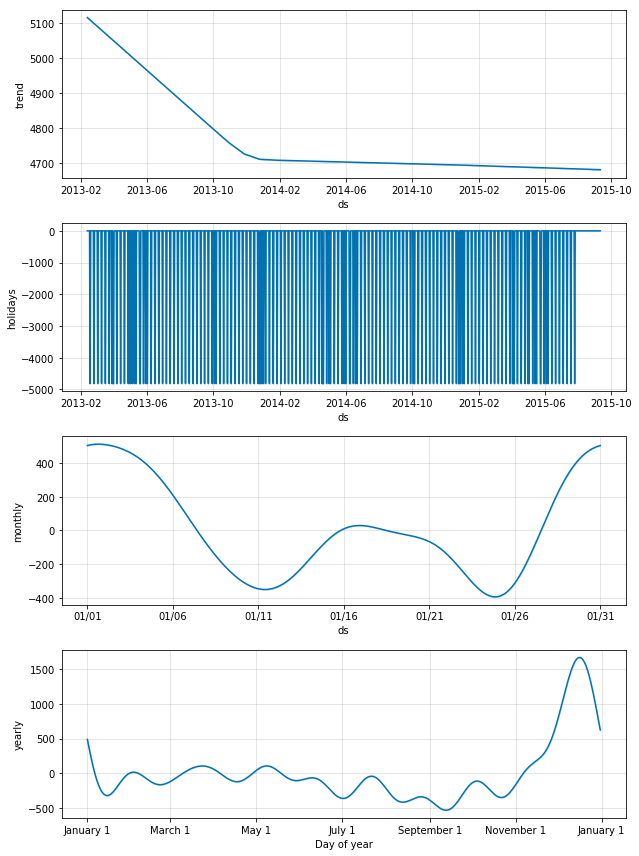

In [100]:
future = m.make_future_dataframe(periods=42)
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()

In [109]:
preds = forecast.yhat

In [110]:
rmse = np.sqrt(mean_squared_error(store_x_test.y, preds[900:]))
print("RMSE: %f" % (rmse))

RMSE: 2052.229645


In [129]:
plot_data = store_x_test
plot_data['yhat'] = preds[900:].values

C:\Users\henri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
plot_data

,ds,y,yhat
970380,2013-02-11,4409,4963.101827
971495,2013-02-10,0,4964.223358
972610,2013-02-09,5370,4927.374608
973725,2013-02-08,5681,4863.772065
974840,2013-02-07,5499,4769.353030
975955,2013-02-06,6140,4639.293258
977070,2013-02-05,6049,4481.414619
978185,2013-02-04,7032,4315.836114
979300,2013-02-03,0,4164.166002
980415,2013-02-02,5970,4041.214990
